# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [1]:
# Write your answer here:

print("2484403")

2484403


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [2]:
# Write your answer here:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf



<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [3]:
# Write your answer here

carfeatures = pd.read_csv("data/features.csv")

carfeatures['horsepower'] = pd.to_numeric(carfeatures['horsepower'], errors='coerce')

fn_horsepower100 = lambda horsepower: horsepower > 100

carfeatures['high_horsepower'] = carfeatures['horsepower'].apply(fn_horsepower100)
amount = np.sum(carfeatures['high_horsepower'])

print(" The number of cars with a horsepower greater than 100 is " + str(amount))

 The number of cars with a horsepower greater than 100 is 150


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [4]:
# Write your answer here:

display(carfeatures)

treshold = 3000 

high_weight = carfeatures.query("weight > @treshold")

low_weight = carfeatures.query("weight <= @treshold")

hw_acc_mean = high_weight["acceleration"].mean()

lw_acc_mean = low_weight["acceleration"].mean()

print("The mean acceleration of the weights > 3000 is " + str(hw_acc_mean)+ ".")
print("The mean acceleration of the weights <= 3000 is " + str(lw_acc_mean)+ ".")

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,high_horsepower
0,18.0,8,307,130.0,3504,12.0,C-1689780,True
1,15.0,8,350,165.0,3693,11.5,B-1689791,True
2,18.0,8,318,150.0,3436,11.0,P-1689802,True
3,16.0,8,304,150.0,3433,12.0,A-1689813,True
4,17.0,8,302,140.0,3449,10.5,F-1689824,True
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86.0,2790,15.6,F-1694103,False
394,44.0,4,97,52.0,2130,24.6,V-1694114,False
395,32.0,4,135,84.0,2295,11.6,D-1694125,False
396,28.0,4,120,79.0,2625,18.6,F-1694136,False


The mean acceleration of the weights > 3000 is 14.7.
The mean acceleration of the weights <= 3000 is 16.202173913043477.


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64

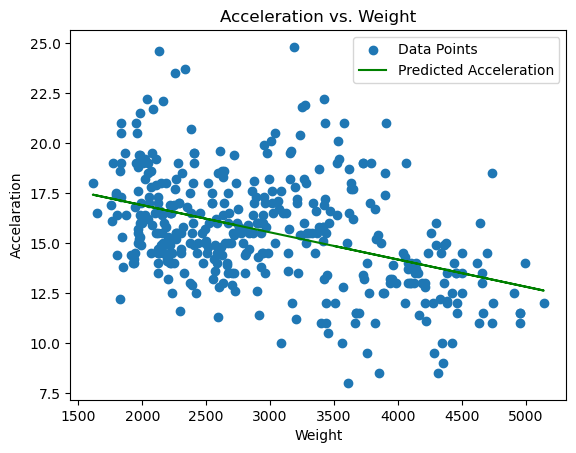

In [5]:
# Write your answer here:

reg = smf.ols(formula = 'acceleration ~ weight', data= carfeatures)
regresults = reg.fit()

coef = regresults.params

display(coef)

carfeatures["p_acceleration"] = coef[0] + coef[1] * carfeatures["weight"]

plt.scatter(x = carfeatures["weight"], y = carfeatures["acceleration"])
plt.plot(carfeatures["weight"], carfeatures["p_acceleration"], color = 'green')
plt.legend(labels = ['Data Points', 'Predicted Acceleration'])
plt.xlabel("Weight")
plt.ylabel("Accelaration")
plt.title("Acceleration vs. Weight")
plt.show()



<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [6]:
# Write your own code

fifa = pd.read_csv("data/fifa23_players_basic.csv")

fifa_age = fifa.sort_values(by="Age", ascending= True)

subset_5yng = fifa_age.iloc[:5]

display(subset_5yng)


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,...,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,...,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,...,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,...,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [7]:
# Write your own code

fifa = pd.read_csv("data/fifa23_players_basic.csv")

value_mean = fifa["Value(in Euro)"].mean()

value_abovemean = fifa.query(" `Value(in Euro)` > @value_mean")

display(value_abovemean)

print(" The amount of players, with a Value (in Euro) above the mean is " + str(len(value_abovemean)))


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,F. Rieder,Fabian Rieder,68,83,2900000,"CAM,CM",CAM,Switzerland,https://cdn.sofifa.net/players/259/306/23_60.png,20,...,Left,3,2,1,-,https://cdn.sofifa.net/flags/ch.png,-,-,High,Medium
7071,J. Bakayoko,Johan Bakayoko,68,85,3100000,RW,LM,Belgium,https://cdn.sofifa.net/players/265/450/23_60.png,19,...,Left,3,3,1,-,https://cdn.sofifa.net/flags/be.png,-,-,High,Medium
7090,M. Arezo,Matías Arezo,68,81,2900000,"ST,CAM",ST,Uruguay,https://cdn.sofifa.net/players/254/653/23_60.png,19,...,Right,3,4,1,-,https://cdn.sofifa.net/flags/uy.png,-,-,High,Medium
7096,Y. Kallon,Yayah Kallon,68,82,3000000,"RM,RW,CF",ST,Sierra Leone,https://cdn.sofifa.net/players/262/333/23_60.png,21,...,Left,2,3,1,-,-,-,-,High,Low


 The amount of players, with a Value (in Euro) above the mean is 3216


<font size = "5">